##### URLs

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>url</th>
      <th>checkbox</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>6</th>
      <td><a href="https://player.vimeo.com/video/656847896?h=11de775937">https://player.vimeo.com/video/656847896?h=11de775937</a></td>
      <td><input type="checkbox"></td>
    </tr>
    <tr>
      <th>7</th>
      <td><a href="https://player.vimeo.com/video/656847237?h=4b5cfed5d6">https://player.vimeo.com/video/656847237?h=4b5cfed5d6</a></td>
      <td><input type="checkbox"></td>
    </tr>
    <tr>
      <th>8</th>
      <td><a href="https://player.vimeo.com/video/656849559?h=bca444c8af">https://player.vimeo.com/video/656849559?h=bca444c8af</a></td>
      <td><input type="checkbox"></td>
    </tr>
    <tr>
      <th>9</th>
      <td><a href="https://player.vimeo.com/video/656849505?h=f153a4f005">https://player.vimeo.com/video/656849505?h=f153a4f005</a></td>
      <td><input type="checkbox"></td>
    </tr>
    <tr>
      <th>10</th>
      <td><a href="https://player.vimeo.com/video/656849254?h=e6faad47ca">https://player.vimeo.com/video/656849254?h=e6faad47ca</a></td>
      <td><input type="checkbox"></td>
    </tr>
    <tr>
      <th>11</th>
      <td><a href="https://player.vimeo.com/video/656848911?h=7939dcd479">https://player.vimeo.com/video/656848911?h=7939dcd479</a></td>
      <td><input type="checkbox"></td>
    </tr>
  </tbody>
</table>

### Goals

- Build a modle to predict apartment price
- Evaluate all the features inour dataset for use in our model.
- Create two deployments of our trained model

- Prepare Data:
    -  Import - wrangle function and list comprehension
    - Explore - Null, values, high and low cardinality, leakage , multicollinearity
    - Split
-   Build Model
    - Baseline
    - Iterate
    - Evaluate
- Communicate Results
    - make_predictions function
    - Interactive dashboard and MVP

In [108]:
import warnings
from glob import glob

import pandas as pd
import seaborn as sns   #Data Visualisation
from category_encoders import OneHotEncoder
from IPython.display import VimeoVideo  
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact   # Interactive Dashboard
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted
from data_wrangling_pipeline import wrangle

warnings.simplefilter(action="ignore", category=FutureWarning)

In [109]:
files = glob("data/buenos-aires-real-estate-*.csv")
print(files)

['data\\buenos-aires-real-estate-1.csv', 'data\\buenos-aires-real-estate-2.csv', 'data\\buenos-aires-real-estate-3.csv', 'data\\buenos-aires-real-estate-4.csv', 'data\\buenos-aires-real-estate-5.csv']


In [110]:
df = pd.concat([wrangle(filepath) for filepath in files], ignore_index=True,axis=0)

#### Exploratory Data Analysis

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6582 entries, 0 to 6581
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price_aprox_usd        6582 non-null   float64
 1   surface_covered_in_m2  6582 non-null   float64
 2   lat                    6316 non-null   float64
 3   lon                    6316 non-null   float64
 4   neighborhood           6582 non-null   object 
dtypes: float64(4), object(1)
memory usage: 257.2+ KB


In [112]:
df.isnull().sum()/len(df)

price_aprox_usd          0.000000
surface_covered_in_m2    0.000000
lat                      0.040413
lon                      0.040413
neighborhood             0.000000
dtype: float64

<p style="color:yellow; font-size:20px">Low and High cardinallity categorical variables</p>

In [113]:
df.select_dtypes("object").head()

,neighborhood
0,Chacarita
1,Villa Luro
2,Caballito
3,Constitución
4,Once


In [114]:
df.select_dtypes("object").nunique()

neighborhood    57
dtype: int64

<p style="color:orange">Data Leakage</p>
in machine learning occurs when information that won't be available at the time of prediction is used to train the model, leading to overly optimistic performance metrics and poor real-world performance. This unintended inclusion of outside or future information causes the model to "cheat" by learning patterns it shouldn't, resulting in unreliable predictions when deployed. 

In [115]:
sorted(df.columns)

['lat', 'lon', 'neighborhood', 'price_aprox_usd', 'surface_covered_in_m2']

<p style="color:orange; font-size:30px">Multicollinearity</p>

In machine learning, multicollinearity is the presence of a high correlation between two or more predictor variables (independent variables) within a regression model. This condition makes it difficult to determine the independent impact of each correlated variable on the dependent variable, leading to unstable and unreliable model coefficients, even if the model's overall predictive accuracy (like R-squared) appears high

In [116]:
df.columns

Index(['price_aprox_usd', 'surface_covered_in_m2', 'lat', 'lon',
       'neighborhood'],
      dtype='object')

In [117]:
corr = df.select_dtypes("number").drop(columns="price_aprox_usd").corr()
corr

,surface_covered_in_m2,lat,lon
surface_covered_in_m2,1.000000,0.028538,0.034515
lat,0.028538,1.000000,-0.262439
lon,0.034515,-0.262439,1.000000


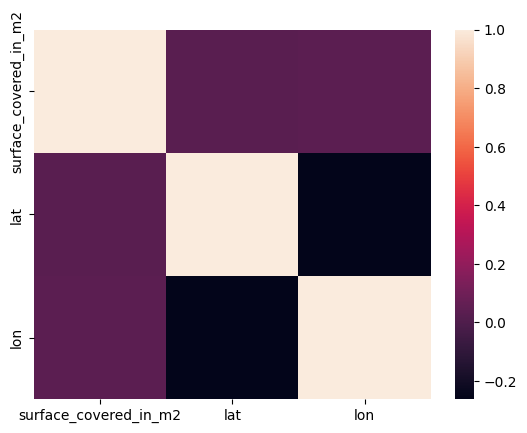

In [118]:
sns.heatmap(corr);

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6582 entries, 0 to 6581
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price_aprox_usd        6582 non-null   float64
 1   surface_covered_in_m2  6582 non-null   float64
 2   lat                    6316 non-null   float64
 3   lon                    6316 non-null   float64
 4   neighborhood           6582 non-null   object 
dtypes: float64(4), object(1)
memory usage: 257.2+ KB


In [120]:
target = "price_aprox_usd"
y_train = df[target]
X_train = df.drop(columns=[target])

In [121]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean]*len(y_train)
print(f"Mean apt price: {round(y_mean,2)}")
print(f"Baseline MAE: {mean_absolute_error(y_train, y_pred_baseline)}")

Mean apt price: 132383.84
Baseline MAE: 44860.10834274133


In [122]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    Ridge()
)

In [123]:
model.fit(X_train,y_train)

,steps,"[('onehotencoder', ...), ('simpleimputer', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,verbose,0
,cols,['neighborhood']
,drop_invariant,False
,return_df,True
,handle_missing,'value'
,handle_unknown,'value'
,use_cat_names,True


In [124]:
y_predict_training = model.predict(X_train)
print(f"Training MAE: ", mean_absolute_error(y_train,y_predict_training))

Training MAE:  24207.107190330313


In [125]:
def make_prediction (area, lat,lon,neighborhood):

    data={
        "surface_covered_in_m2":area,
        "lat":lat,
        "lon":lon,
        "neighborhood":neighborhood
    }
    df=pd.DataFrame(data,index=[0])
    prediction = model.predict(df)
    return f"Predicted aparment priced: ${prediction[0].round(2)}"

In [126]:
make_prediction(110,-34.60,-58.46,"Villa Crespo")

'Predicted aparment priced: $250775.11'

##### Interactive Dashboard

In [127]:
interact(
    make_prediction,
    area=IntSlider(
        min=X_train["surface_covered_in_m2"].min(),
        max=X_train["surface_covered_in_m2"].max(),
        value=X_train["surface_covered_in_m2"].mean(),
    ),
    lat=FloatSlider(
        min=X_train["lat"].min(),
        max=X_train["lat"].max(),
        step=0.01,
        value=X_train["lat"].mean(),
    ),
    lon=FloatSlider(
        min=X_train["lon"].min(),
        max=X_train["lon"].max(),
        step=0.01,
        value=X_train["lon"].mean(),
    ),
    neighborhood=Dropdown(options=sorted(X_train["neighborhood"].unique())),
);

interactive(children=(IntSlider(value=53, description='area', max=101, min=30), FloatSlider(value=-34.59890626…